In [1]:
#%%capture
#!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-sql-kafka-0-10_2.12/3.3.1/spark-sql-kafka-0-10_2.12-3.3.1.jar"
#!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10_2.12/3.1.3/spark-streaming-kafka-0-10_2.12-3.1.3.jar"

In [1]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.1.3,org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.1 pyspark-shell'

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.appName("quiz1").master("local").getOrCreate()

schema = StructType() \
 .add("id", IntegerType(), True) \
 .add("name", StringType(), True) \
 .add("age", IntegerType(), True) \
 .add("profession", StringType(), True) \
 .add("city", StringType(), True) \
 .add("salary", DoubleType(), True)

In [4]:
customer = spark \
    .readStream \
    .option("header", True) \
    .option("maxFilesPerTrigger",1)\
    .schema(schema) \
    .csv("/home/jovyan/tmp/text")

In [5]:
customer.isStreaming

True

In [6]:
customer.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- profession: string (nullable = true)
 |-- city: string (nullable = true)
 |-- salary: double (nullable = true)



In [7]:
average_salaries = customer.groupBy("profession")\
    .agg(
        (avg("salary").alias("average_salary")),
        (count("profession").alias("count"))
    )\
    .sort(desc("average_salary"))

In [8]:
average_salaries.printSchema()

root
 |-- profession: string (nullable = true)
 |-- average_salary: double (nullable = true)
 |-- count: long (nullable = false)



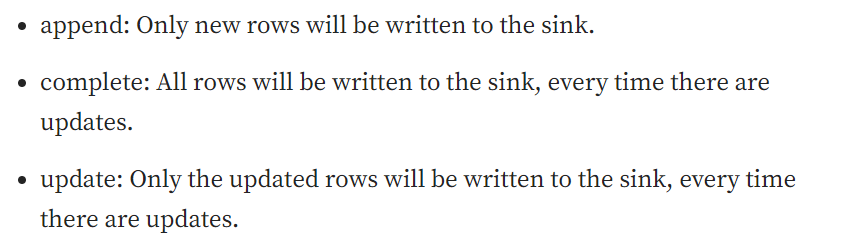s.

In [9]:
query = average_salaries \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 